In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import pywt
import numpy as np

# NEW DATA


# Reading first three files:


In [ ]:
data_A = json.load(open('2023_06_04T00:04:37_2_A.json'))
data_B = json.load(open('2023_06_04T00:04:37_2_B.json'))
data_C = json.load(open('2023_06_04T00:04:37_2_C.json'))

In [ ]:
data_A['spectrum_chart'][1:][1][1]

0.0015234825

In [ ]:
data_a = data_A["spectrum_chart"]
data_a_info = data_A["unit_parameters"]
df_a_info = pd.DataFrame.from_dict([data_a_info]).transpose()
df_a = pd.DataFrame(data_a[1:], columns=data_a[0])

data_b = data_B["spectrum_chart"]
data_b_info = data_B["unit_parameters"]
df_b_info = pd.DataFrame.from_dict([data_b_info]).transpose()
df_b = pd.DataFrame(data_b[1:], columns=data_b[0])

data_c = data_C["spectrum_chart"]
data_c_info = data_C["unit_parameters"]
df_c_info = pd.DataFrame.from_dict([data_c_info]).transpose()
df_c = pd.DataFrame(data_c[1:], columns=data_c[0])

# Extracting information on the setup of the machines used in these three files.

In [ ]:
merged_info = pd.concat([df_a_info, df_b_info, df_c_info], axis=1)
merged_info.columns = ['A_info', 'B_info', 'C_info']
merged_info

,A_info,B_info,C_info
n,100.0,100.0,100.0
cv,638.9662,638.9662,638.9662
dt,0.999956,0.999956,0.999956
fr,50.0,50.0,50.0
ft,0.000235,0.000235,0.000235
lo,0.0,0.0,0.0
mc,-6906.4355,-6906.4355,-6906.4355
nl,-458.0761,-458.0761,-458.0761
pf,0.0,0.0,0.0
pl,456.2107,456.2107,456.2107


**We can see that all three time series were generated on the same machine and at the same time, we can conclude that these three files store information about values of three-phase current signature with Current A, Current B and Current C. This menas that we have to analyse these time series together as they share the information about the process we examine.**

# Exploring time series data

**Here i have merged information from three different files into a sinle dataset.**

In [ ]:
df_const = df_a.merge(df_b, on='freq', suffixes=('_A', '_B')).merge(df_c, on='freq')
df_const = df_const.rename(columns={'ampl': 'ampl_C'})
df_const

,freq,ampl_A,ampl_B,ampl_C
0,0,0.168966,0.152076,0.145060
1,1,0.001523,0.034549,0.023187
2,2,0.006107,0.029112,0.022469
3,3,0.002197,0.038957,0.013248
4,4,0.009822,0.035821,0.012681
...,...,...,...,...
2043,2043,0.003923,0.000404,0.001795
2044,2044,0.004637,0.000764,0.000602
2045,2045,0.003891,0.001063,0.000489
2046,2046,0.003975,0.001391,0.000797


In [ ]:
df_merged = df_a.merge(df_b, on='freq', suffixes=('_A', '_B')).merge(df_c, on='freq')
df_merged = df_merged.rename(columns={'ampl': 'ampl_C'})
df_merged

,freq,ampl_A,ampl_B,ampl_C
0,0,0.168966,0.152076,0.145060
1,1,0.001523,0.034549,0.023187
2,2,0.006107,0.029112,0.022469
3,3,0.002197,0.038957,0.013248
4,4,0.009822,0.035821,0.012681
...,...,...,...,...
2043,2043,0.003923,0.000404,0.001795
2044,2044,0.004637,0.000764,0.000602
2045,2045,0.003891,0.001063,0.000489
2046,2046,0.003975,0.001391,0.000797


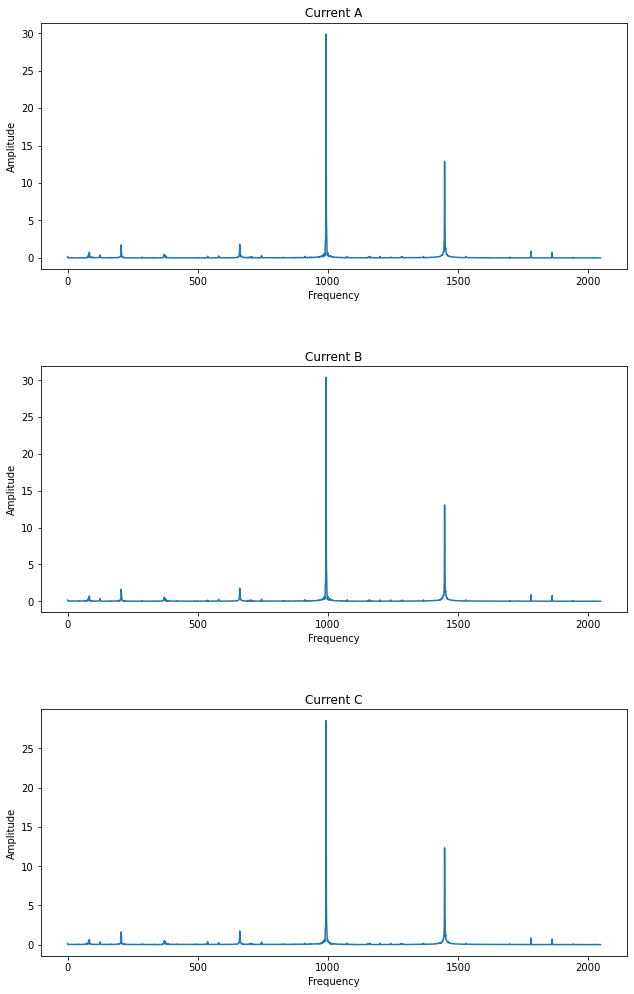

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 15))


axs[0].plot(df_merged['freq'], df_merged['ampl_A'], label="Current A")
axs[0].set_title('Current A')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')


axs[1].plot(df_merged['freq'], df_merged['ampl_B'], label="Current B")
axs[1].set_title('Current B')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')


axs[2].plot(df_merged['freq'], df_merged['ampl_C'], label="Current C")
axs[2].set_title('Current C')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')


plt.tight_layout(pad=5.0)


plt.show()

In [ ]:
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1


    outlier_criteria = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))


    mean = df.loc[~outlier_criteria, column].mean()


    df.loc[outlier_criteria, column] = mean

    return df

In [ ]:
df_merged = replace_outliers_with_mean(df_merged, 'ampl_A')
df_merged = replace_outliers_with_mean(df_merged, 'ampl_B')
df_merged = replace_outliers_with_mean(df_merged, 'ampl_C')

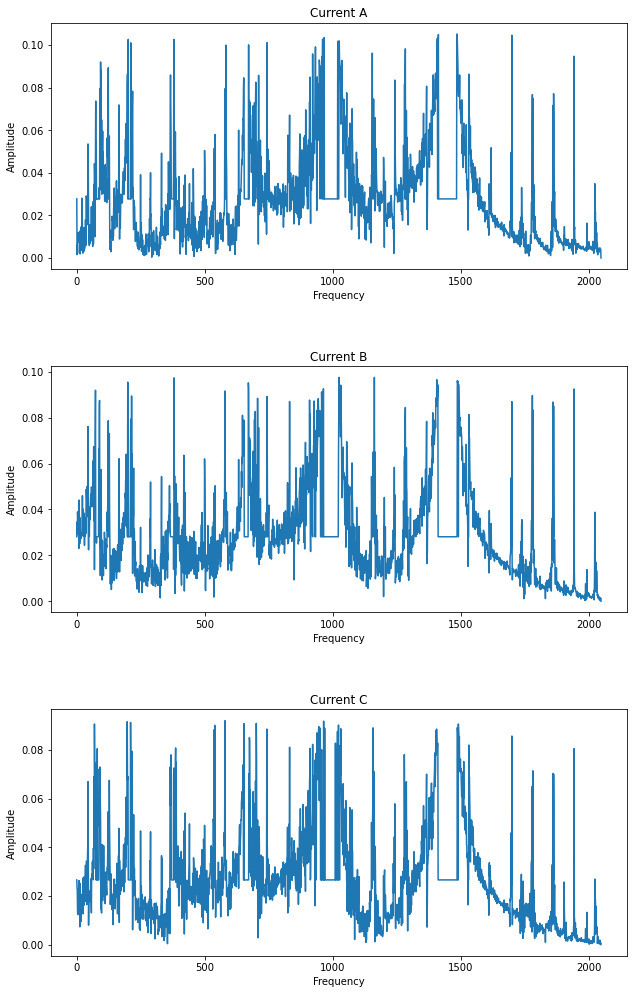

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 15))


axs[0].plot(df_merged['freq'], df_merged['ampl_A'], label="Current A")
axs[0].set_title('Current A')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')


axs[1].plot(df_merged['freq'], df_merged['ampl_B'], label="Current B")
axs[1].set_title('Current B')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')


axs[2].plot(df_merged['freq'], df_merged['ampl_C'], label="Current C")
axs[2].set_title('Current C')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')


plt.tight_layout(pad=5.0)


plt.show()

# Wavelet denoising

In [ ]:

def denoise(data, wavelet, level):
    coeff = pywt.wavedec(data, wavelet, mode="per", level=level)

    sigma = (1/0.6745) * np.median(np.abs(coeff[-level] - np.median(coeff[-level])))
    uthresh = sigma * np.sqrt(2*np.log(len(data)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

wavelet = 'db8'
level = 2


df_merged['ampl_A_den'] = denoise(df_merged['ampl_A'], wavelet, level)
df_merged['ampl_B_den'] = denoise(df_merged['ampl_B'], wavelet, level)
df_merged['ampl_C_den'] = denoise(df_merged['ampl_C'], wavelet, level)

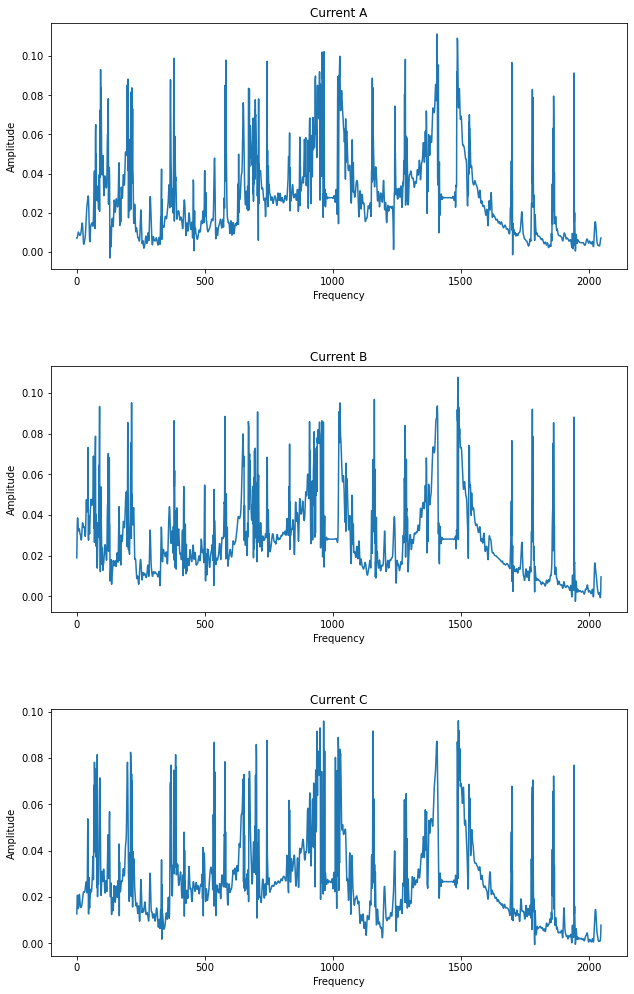

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].plot(df_merged['freq'], df_merged['ampl_A_den'], label="Current A")
axs[0].set_title('Current A')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')

axs[1].plot(df_merged['freq'], df_merged['ampl_B_den'], label="Current B")
axs[1].set_title('Current B')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')

axs[2].plot(df_merged['freq'], df_merged['ampl_C_den'], label="Current C")
axs[2].set_title('Current C')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')


plt.tight_layout(pad=5.0)

plt.show()

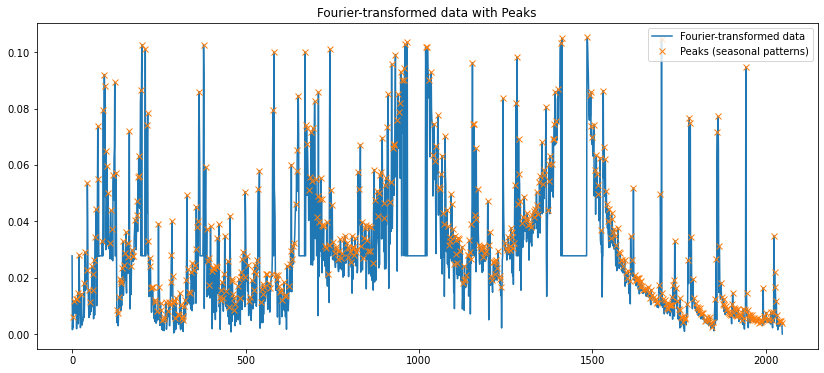

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


df_merged['abs_fourier_data'] = np.abs(df_merged['ampl_A'])

peaks, _ = find_peaks(df_merged['abs_fourier_data'])

plt.figure(figsize=(14, 6))
plt.plot(df_merged['abs_fourier_data'], label='Fourier-transformed data')
plt.plot(peaks, df_merged['abs_fourier_data'][peaks], "x", label='Peaks (seasonal patterns)')
plt.title('Fourier-transformed data with Peaks')
plt.legend()
plt.show()

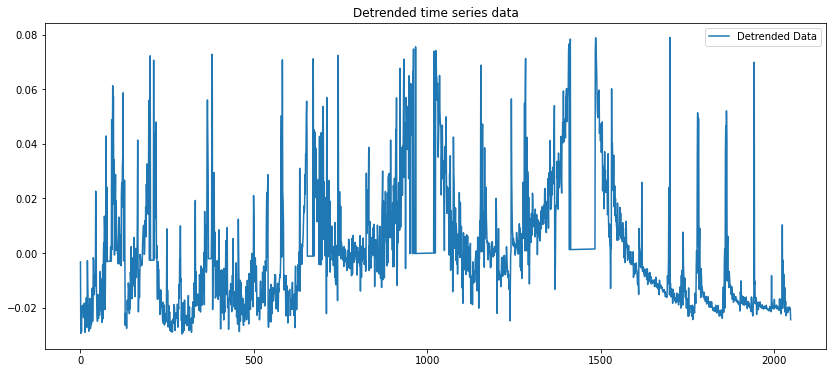

In [ ]:
from scipy import signal

# suppose 'time_series_data' is your original time-series data column.
# Detrend the data
detrended_data = signal.detrend(df_merged['ampl_A'])

# Plot the detrended data
plt.figure(figsize=(14, 6))
plt.plot(detrended_data, label='Detrended Data')
plt.title('Detrended time series data')
plt.legend()
plt.show()

# Autocorrelation

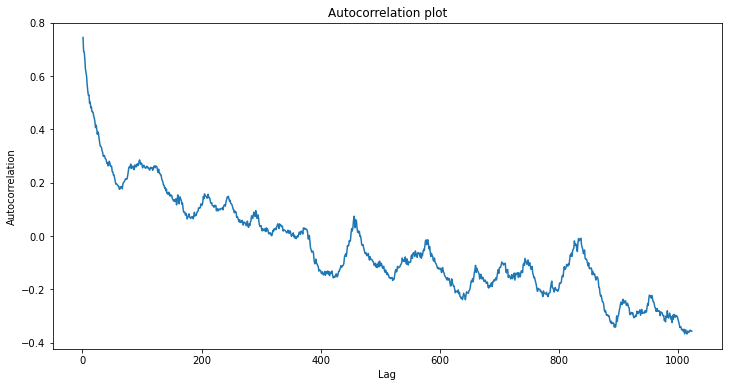

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series(df_merged['ampl_A'])

lags = range(1, len(s)//2)
autocorrs = [s.autocorr(lag) for lag in lags]

plt.figure(figsize=(12, 6))
plt.plot(lags, autocorrs)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation plot')
plt.show()


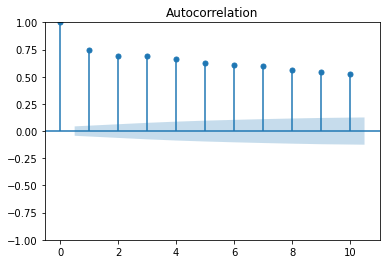

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(s, lags=10)
plt.show()

# Rolling Statistics For Three Data Channels

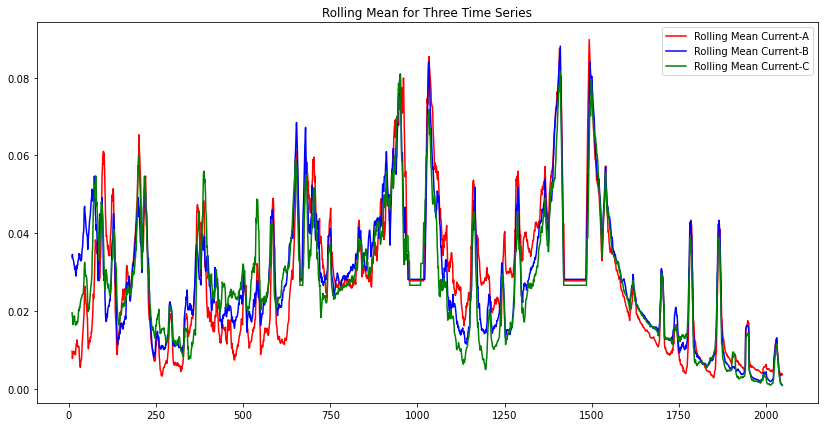

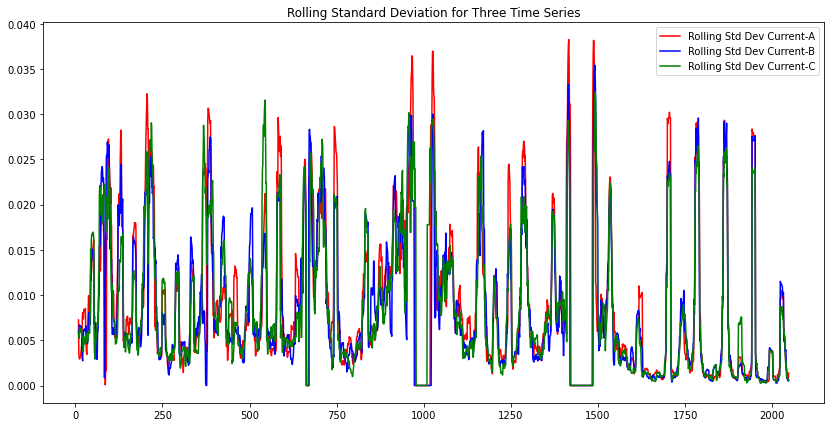

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


rolling_mean_1 = df_merged['ampl_A'].rolling(window=10).mean()
rolling_mean_2 = df_merged['ampl_B'].rolling(window=10).mean()
rolling_mean_3 = df_merged['ampl_C'].rolling(window=10).mean()

rolling_std_1 = df_merged['ampl_A'].rolling(window=10).std()
rolling_std_2 = df_merged['ampl_B'].rolling(window=10).std()
rolling_std_3 = df_merged['ampl_C'].rolling(window=10).std()


plt.figure(figsize=(14, 7))
plt.plot(rolling_mean_1, color='red', label='Rolling Mean Current-A')
plt.plot(rolling_mean_2, color='blue', label='Rolling Mean Current-B')
plt.plot(rolling_mean_3, color='green', label='Rolling Mean Current-C')
plt.legend(loc='best')
plt.title('Rolling Mean for Three Time Series')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(rolling_std_1, color='red', label='Rolling Std Dev Current-A')
plt.plot(rolling_std_2, color='blue', label='Rolling Std Dev Current-B')
plt.plot(rolling_std_3, color='green', label='Rolling Std Dev Current-C')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation for Three Time Series')
plt.show()


# Rolling Statistics For One Data Channel

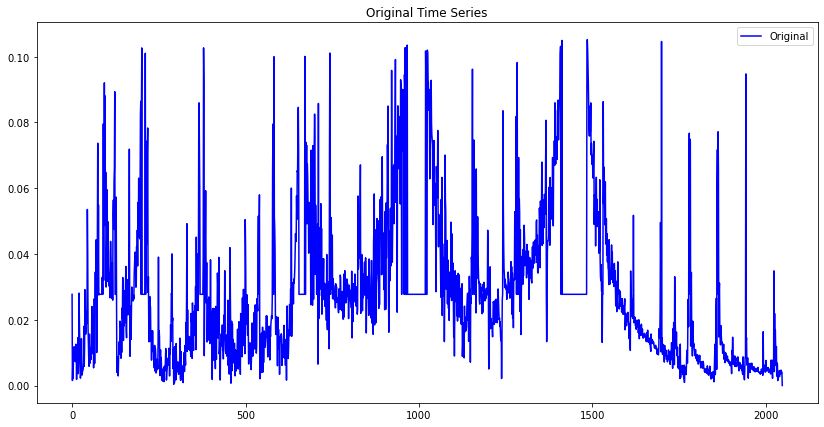

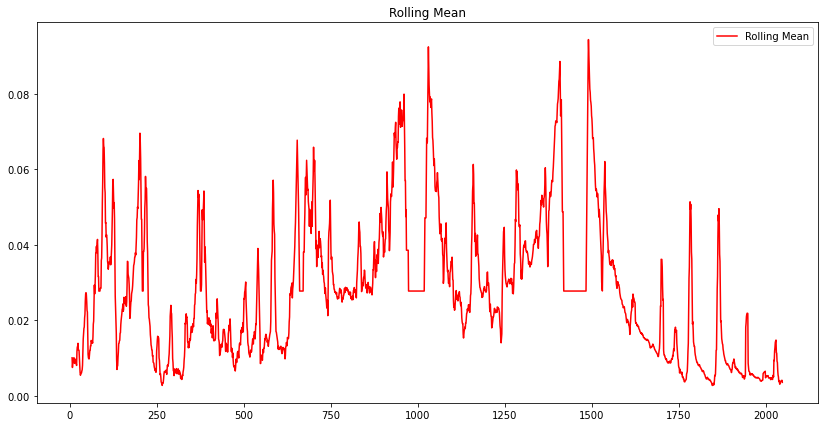

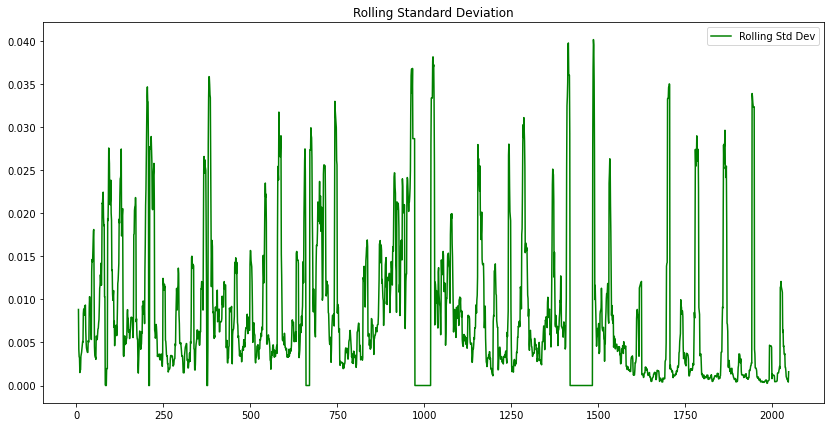

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


rolling_mean = df_merged['ampl_A'].rolling(window=7).mean()
rolling_std = df_merged['ampl_A'].rolling(window=7).std()

plt.figure(figsize=(14, 7))
plt.plot(df_merged['ampl_A'], color='blue', label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(rolling_std, color='green', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation')
plt.show()


# Here we look into the next three files

In [ ]:
data_A1 = json.load(open('/Users/svirinstepan/Documents/spectra_json/2023_06_04T00:14:37_2_A.json'))
data_B1 = json.load(open('/Users/svirinstepan/Documents/spectra_json/2023_06_04T00:14:37_2_B.json'))
data_C1 = json.load(open('/Users/svirinstepan/Documents/spectra_json/2023_06_04T00:14:37_2_C.json'))

In [ ]:
data_a1 = data_A1["spectrum_chart"]
data_a1_info = data_A1["unit_parameters"]
df_a1_info = pd.DataFrame.from_dict([data_a1_info]).transpose()
df_a1 = pd.DataFrame(data_a1[1:], columns=data_a1[0])

data_b1 = data_B1["spectrum_chart"]
data_b1_info = data_B1["unit_parameters"]
df_b1_info = pd.DataFrame.from_dict([data_b1_info]).transpose()
df_b1 = pd.DataFrame(data_b1[1:], columns=data_b1[0])

data_c1 = data_C1["spectrum_chart"]
data_c1_info = data_C1["unit_parameters"]
df_c1_info = pd.DataFrame.from_dict([data_c1_info]).transpose()
df_c1 = pd.DataFrame(data_c1[1:], columns=data_c1[0])

In [ ]:
merged_info1 = pd.concat([df_a1_info, df_b1_info, df_c1_info], axis=1)
merged_info1.columns = ['A1_info', 'B1_info', 'C1_info']
merged_info1

,A1_info,B1_info,C1_info
n,100.0,100.0,100.0
cv,638.9662,638.9662,638.9662
dt,0.999956,0.999956,0.999956
fr,50.0,50.0,50.0
ft,0.000235,0.000235,0.000235
lo,0.0,0.0,0.0
mc,-6906.4355,-6906.4355,-6906.4355
nl,-458.0761,-458.0761,-458.0761
pf,0.0,0.0,0.0
pl,456.2107,456.2107,456.2107


In [ ]:
merged_info_between = pd.concat([df_a_info, df_a1_info], axis=1)
merged_info_between.columns = ['A_info', 'A1_info']
merged_info_between

,A_info,A1_info
n,100.0,100.0
cv,638.9662,638.9662
dt,0.999956,0.999956
fr,50.0,50.0
ft,0.000235,0.000235
lo,0.0,0.0
mc,-6906.4355,-6906.4355
nl,-458.0761,-458.0761
pf,0.0,0.0
pl,456.2107,456.2107


In [ ]:
df_merged1 = df_a1.merge(df_b1, on='freq', suffixes=('_A', '_B')).merge(df_c1, on='freq')
df_merged1 = df_merged1.rename(columns={'ampl': 'ampl_C'})
df_merged1

,freq,ampl_A,ampl_B,ampl_C
0,0,0.183251,0.113464,0.143278
1,1,0.007082,0.002794,0.023666
2,2,0.008547,0.013558,0.024914
3,3,0.005702,0.001277,0.021728
4,4,0.009898,0.001806,0.017910
...,...,...,...,...
2043,2043,0.015354,0.024704,0.023779
2044,2044,0.015516,0.023649,0.025160
2045,2045,0.015436,0.026543,0.025393
2046,2046,0.016954,0.026006,0.024619


In [ ]:
df_const['freq']=df_const['freq']+2048

In [ ]:
df_appended = df_merged1.append(df_const)
df_appended

/var/folders/qj/ml__msrj393fgw_nwl98fcdc0000gn/T/ipykernel_14157/3615336398.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_appended = df_merged1.append(df_const)


,freq,ampl_A,ampl_B,ampl_C
0,0,0.183251,0.113464,0.143278
1,1,0.007082,0.002794,0.023666
2,2,0.008547,0.013558,0.024914
3,3,0.005702,0.001277,0.021728
4,4,0.009898,0.001806,0.017910
...,...,...,...,...
2043,4091,0.003923,0.000404,0.001795
2044,4092,0.004637,0.000764,0.000602
2045,4093,0.003891,0.001063,0.000489
2046,4094,0.003975,0.001391,0.000797


In [ ]:
df_appended.to_csv('appended_df.csv', index=False)

In [ ]:
df_appended = replace_outliers_with_mean(df_appended, 'ampl_A')
df_appended = replace_outliers_with_mean(df_appended, 'ampl_B')
df_appended = replace_outliers_with_mean(df_appended, 'ampl_C')

In [ ]:
df_link = df_appended[2030:2060]

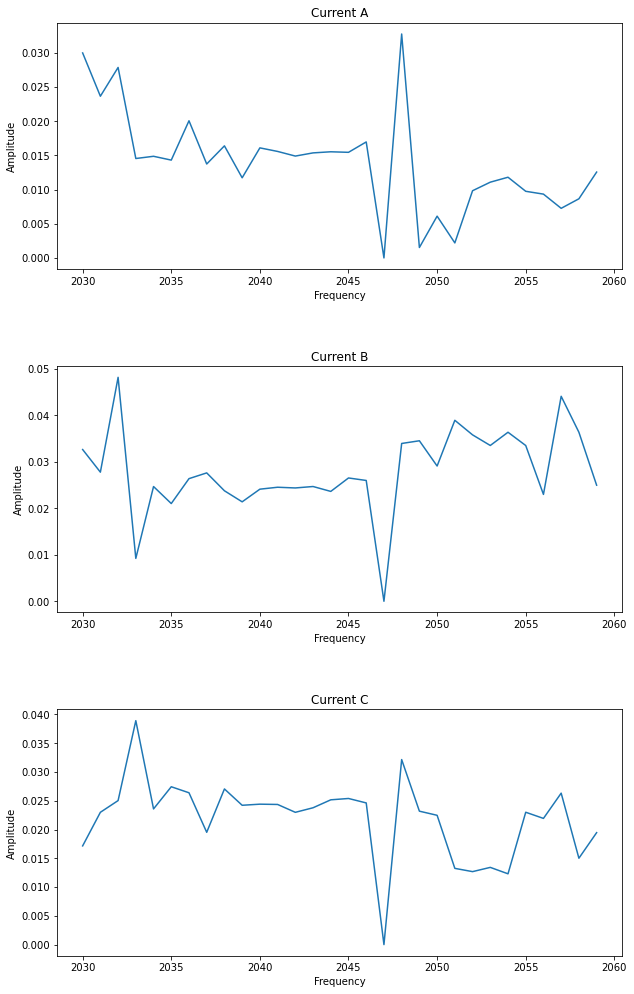

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 15))

axs[0].plot(df_link['freq'], df_link['ampl_A'], label="Current A")
axs[0].set_title('Current A')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Amplitude')

axs[1].plot(df_link['freq'], df_link['ampl_B'], label="Current B")
axs[1].set_title('Current B')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')

axs[2].plot(df_link['freq'], df_link['ampl_C'], label="Current C")
axs[2].set_title('Current C')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')

plt.tight_layout(pad=5.0)

plt.show()

**We can see that the transition from the first files containing information about three currents to the second group of files is not relly smooth, this may mean that in our dataset we do not have information on one contininous observation, but on several more short observations and that the groups os files are not connected.**

# OPEN DATASET

In [ ]:
filename = '/Users/svirinstepan/Downloads/Current Signature Dataset of Three-Phase Induction Motor under Varying Load Conditions/3-Phase-current-12-4mm-broken-rotor-bar-fault/BRB-12-4-300watt.csv'
df_h = pd.read_csv(filename, usecols = ['Time Stamp', ' Current-A', ' Current-B', ' Current-C'])
df_h = df_h.rename(columns={'Time Stamp':'Time Stamp',
                            ' Current-A':'Current-A',
                            ' Current-B':'Current-B',
                            ' Current-C':'Current-C'})

In [ ]:
df_h

,Time Stamp,Current-A,Current-B,Current-C
0,13:55:16,2.7204,1.7949,2.8596
1,13:55:16,2.7204,1.7949,2.8596
2,13:55:16,2.7204,1.7949,2.8596
3,13:55:16,2.7204,1.7949,2.8596
4,13:55:16,2.7204,1.7949,2.8596
...,...,...,...,...
133566,14:00:17,2.0794,3.1514,2.3162
133567,14:00:17,2.0794,3.1514,2.3162
133568,14:00:17,2.0794,3.1514,2.3162
133569,14:00:17,2.0794,3.1514,2.3162


# Visualisation

In [ ]:
df_clean = df_h.dropna().copy()
df_clean = df_clean.reset_index()

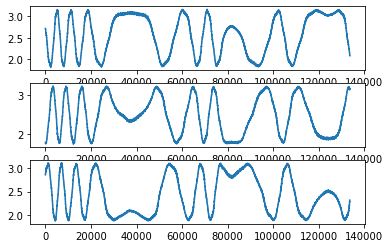

In [ ]:
fig, axs = plt.subplots(3)
axs[0].plot(list(df_clean.index), df_clean['Current-A'])
axs[1].plot(list(df_clean.index), df_clean['Current-B'])
axs[2].plot(list(df_clean.index), df_clean['Current-C'])
plt.show()

# Trend seasonality residuals

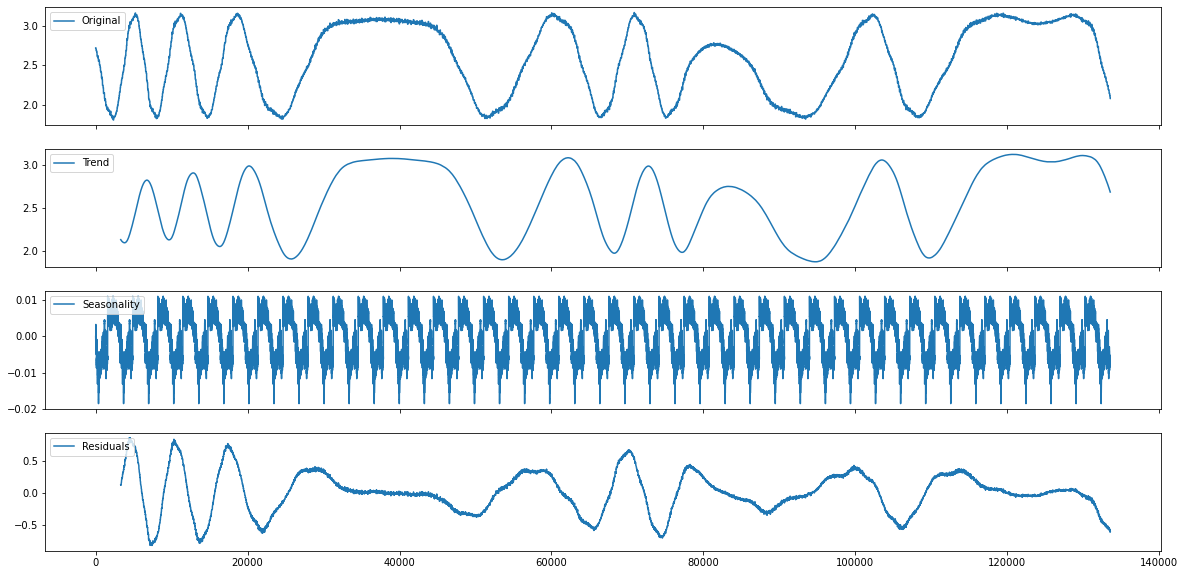

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

import math
test = df_clean['Current-A']
ts_dicomposition = seasonal_decompose(x=test, extrapolate_trend = 0, period = 3300, two_sided = False)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig1, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig1.set_figheight(10)
fig1.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(test, label='Original')
axes[0].legend(loc='upper left')
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left')
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left')
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left')

# Autocorrelation

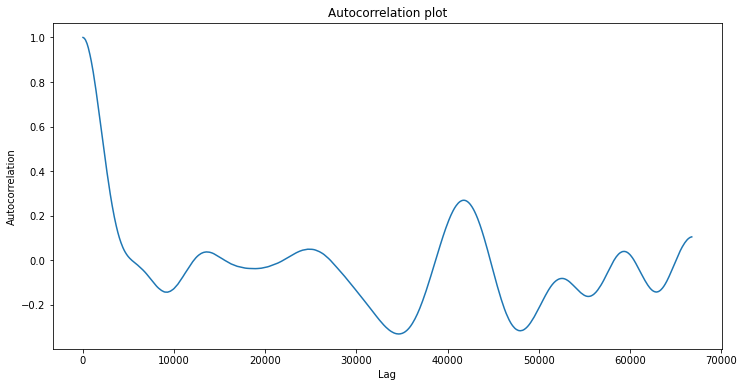

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series(test)

lags = range(1, len(s)//2)
autocorrs = [s.autocorr(lag) for lag in lags]

plt.figure(figsize=(12, 6))
plt.plot(lags, autocorrs)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation plot')
plt.show()


# Rollling statistics for three data channels

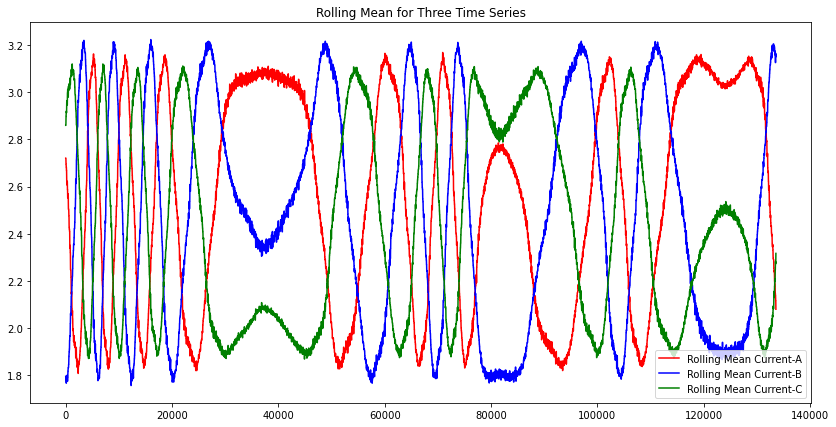

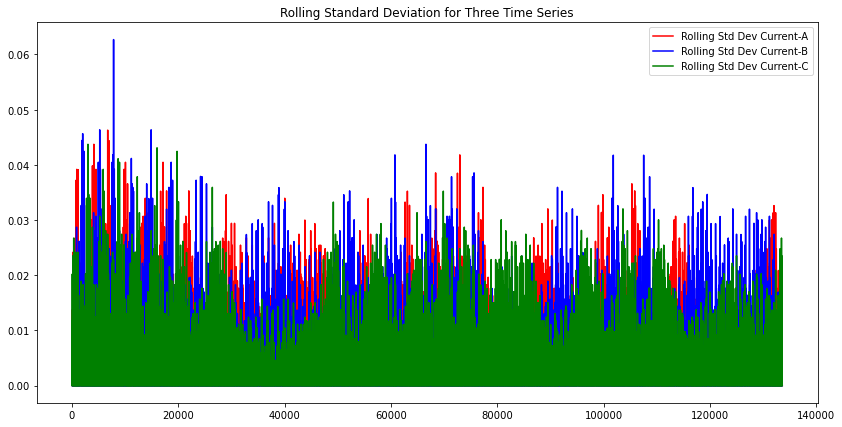

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


rolling_mean_1 = df_clean['Current-A'].rolling(window=7).mean()
rolling_mean_2 = df_clean['Current-B'].rolling(window=7).mean()
rolling_mean_3 = df_clean['Current-C'].rolling(window=7).mean()

rolling_std_1 = df_clean['Current-A'].rolling(window=7).std()
rolling_std_2 = df_clean['Current-B'].rolling(window=7).std()
rolling_std_3 = df_clean['Current-C'].rolling(window=7).std()


plt.figure(figsize=(14, 7))
plt.plot(rolling_mean_1, color='red', label='Rolling Mean Current-A')
plt.plot(rolling_mean_2, color='blue', label='Rolling Mean Current-B')
plt.plot(rolling_mean_3, color='green', label='Rolling Mean Current-C')
plt.legend(loc='best')
plt.title('Rolling Mean for Three Time Series')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(rolling_std_1, color='red', label='Rolling Std Dev Current-A')
plt.plot(rolling_std_2, color='blue', label='Rolling Std Dev Current-B')
plt.plot(rolling_std_3, color='green', label='Rolling Std Dev Current-C')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation for Three Time Series')
plt.show()


# Rolling statistic for One channel

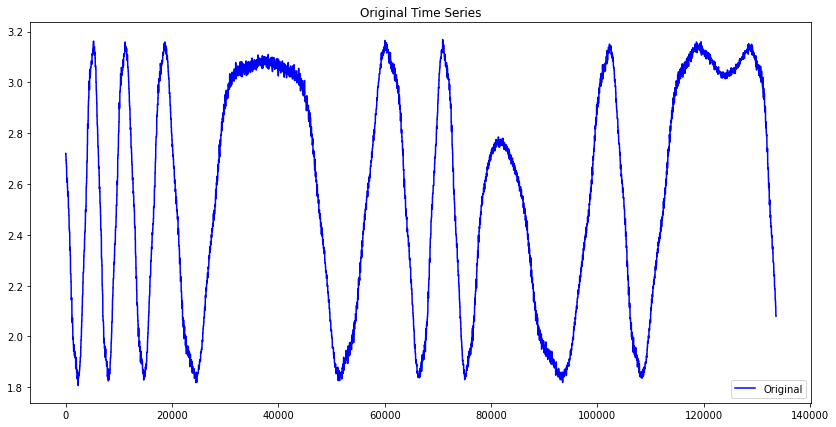

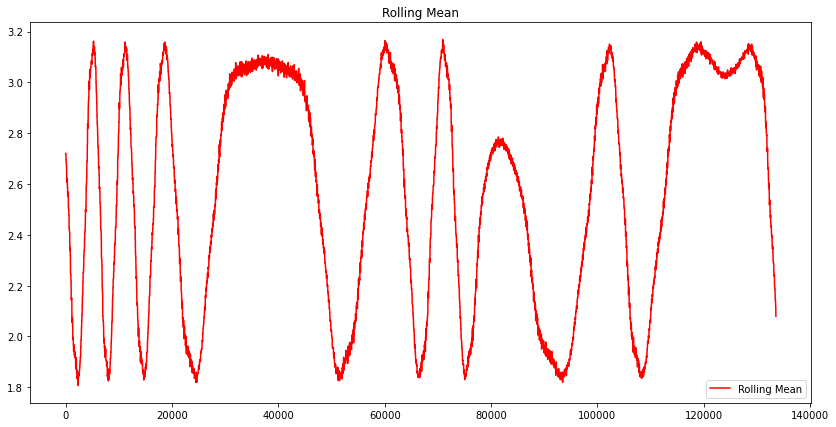

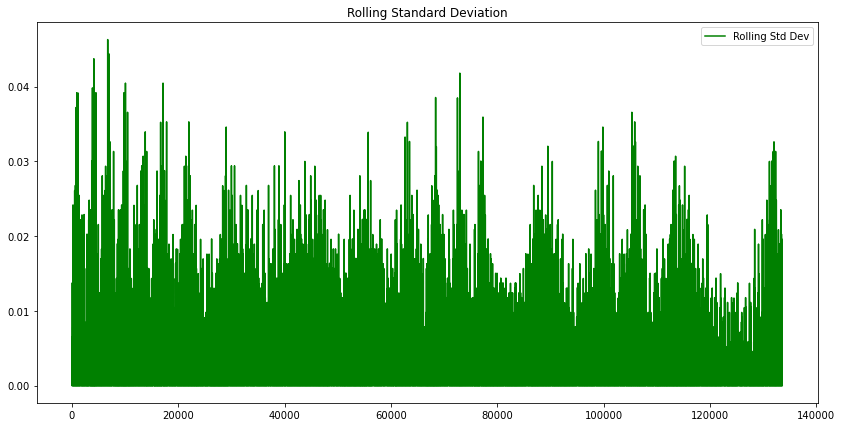

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


rolling_mean = df_clean['Current-A'].rolling(window=7).mean()
rolling_std = df_clean['Current-A'].rolling(window=7).std()

plt.figure(figsize=(14, 7))
plt.plot(df_clean['Current-A'], color='blue', label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(rolling_std, color='green', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation')
plt.show()
